In [1]:
import tensorflow as tf
from tensorflow import keras

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

from keras import layers
import keras

import torchvision.transforms as transforms

#import torchvision.transforms.functional as fn #to covnert images before normalization

from matplotlib import pyplot as plt
import matplotlib.image as mpimg
from PIL import Image

import numpy as np
import pandas as pd
import os
import random 

2023-04-12 23:27:57.661154: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
img_dir_a='data/A'

94.jpg
86.jpg
137.jpg
40.jpg
211.jpg


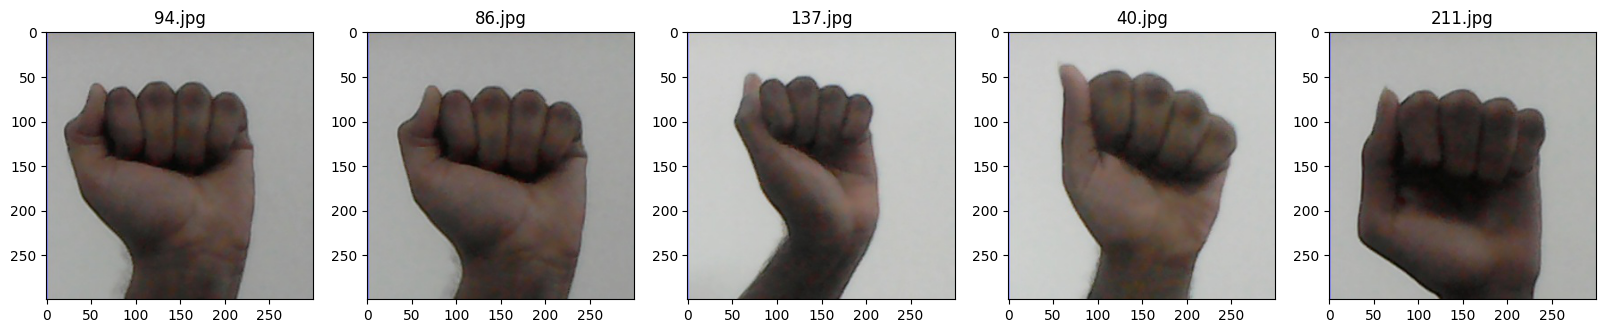

In [3]:
plt.figure(figsize=(20,20))
#test_folder=r'CV\Intel_Images\seg_train\seg_train\forest'
for i in range(5):
    file = random.choice(os.listdir(img_dir_a))
    image_path= os.path.join(img_dir_a, file)
    img=mpimg.imread(image_path)
    ax=plt.subplot(1,5,i+1)
    ax.title.set_text(file)
    plt.imshow(img)
    print(file)

## Getting images using Image

In [4]:
data_path = 'data'
data = []
labels = []

for folder in os.listdir(data_path):
    folder_path = os.path.join(data_path, folder)
    if os.path.isdir(folder_path):
        for file_name in os.listdir(folder_path):
            file_path = os.path.join(folder_path, file_name)
            image = Image.open(file_path)
            data.append(image)
            labels.append(folder)

le = LabelEncoder()
labels = le.fit_transform(labels)

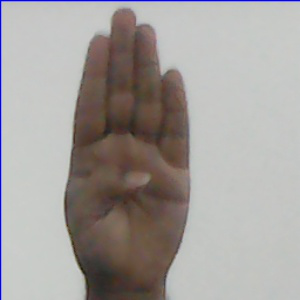

In [5]:
data[1010]

In [6]:
labels[1010]

2

In [7]:
len(data)

1200

In [8]:
np.unique(labels)
# 0 - 0, 1 - A, 2 - B, 3 - C

array([0, 1, 2, 3])

Creating Dataframe with 2 cols: label and image

In [10]:
df = pd.DataFrame(list(zip(data,labels)),columns =['image','label'])

Testing DataFrame

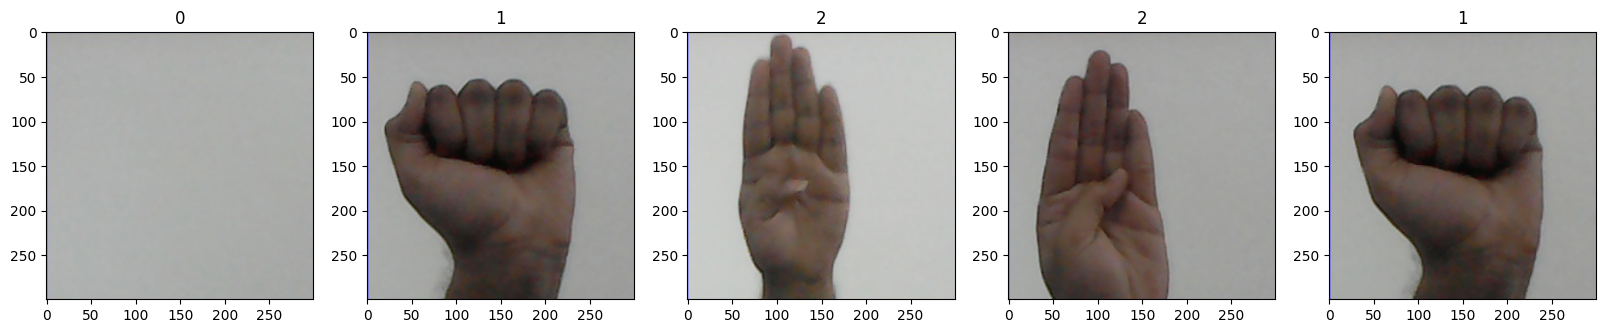

In [11]:
plt.figure(figsize=(20,20))

for i in range(5):
    r = random.randint(0,1199)
    image = df.iloc[r,0]
    label = df.iloc[r,1]
    ax=plt.subplot(1,5,i+1)
    ax.title.set_text(label)
    plt.imshow(image)


In [12]:
type(df.iloc[1000,0])

PIL.JpegImagePlugin.JpegImageFile

## Augumentation

In [13]:
#Horizontally flip the given image randomly with a 100% probability.
transform = transforms.Compose([transforms.RandomHorizontalFlip(1)])

In [14]:
data_flipped = [transform(image) for image in data]

In [15]:
#Create new df with flipped images
df_flipped = pd.DataFrame(list(zip(data_flipped,labels)),columns =['image','label'])

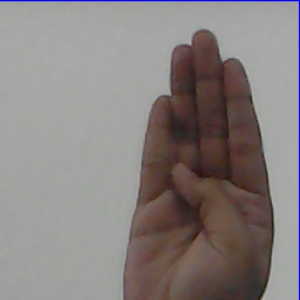

In [16]:
df_flipped.iloc[1000,0]

In [17]:
df = df.append(df_flipped, ignore_index=True)

/var/folders/gz/x1zpthb55vx5zvkyf59p1g280000gn/T/ipykernel_30961/504720457.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_flipped, ignore_index=True)


df contains now 2400 rows. 1200 are original one, 1200 are flipped

In [18]:
df

,image,label
0,<PIL.JpegImagePlugin.JpegImageFile image mode=...,0
1,<PIL.JpegImagePlugin.JpegImageFile image mode=...,0
2,<PIL.JpegImagePlugin.JpegImageFile image mode=...,0
3,<PIL.JpegImagePlugin.JpegImageFile image mode=...,0
4,<PIL.JpegImagePlugin.JpegImageFile image mode=...,0
...,...,...
2395,<PIL.Image.Image image mode=RGB size=300x300 a...,2
2396,<PIL.Image.Image image mode=RGB size=300x300 a...,2
2397,<PIL.Image.Image image mode=RGB size=300x300 a...,2
2398,<PIL.Image.Image image mode=RGB size=300x300 a...,2


## Normalization

In [21]:
 
# Define a transform to convert PIL 
# image to a Torch tensor
transform = transforms.Compose([
    transforms.PILToTensor()
])
  
# transform = transforms.PILToTensor()
# Convert the PIL image to Torch tensor
img_tensor = transform(df.iloc[1000,0])
normalized_tensor = img_tensor / 255  
# print the converted Torch tensor
print(normalized_tensor)

#Converting images to normalized np.array
df['image_nomralized']= df['image'].apply(lambda x: transform(x))
df['image_nomralized']= df['image_nomralized'].apply(lambda x: x / 255)

tensor([[[0.0000, 0.0078, 0.0275,  ..., 0.0314, 0.0314, 0.0314],
         [0.0157, 0.2980, 0.4157,  ..., 0.4235, 0.4235, 0.4235],
         [0.0235, 0.4627, 0.6118,  ..., 0.6157, 0.6157, 0.6157],
         ...,
         [0.0314, 0.4824, 0.6471,  ..., 0.6196, 0.6196, 0.6196],
         [0.0314, 0.4824, 0.6471,  ..., 0.6196, 0.6196, 0.6196],
         [0.0314, 0.4863, 0.6471,  ..., 0.6157, 0.6196, 0.6196]],

        [[0.0157, 0.0314, 0.0196,  ..., 0.0235, 0.0235, 0.0235],
         [0.0471, 0.3098, 0.4000,  ..., 0.4235, 0.4235, 0.4235],
         [0.0275, 0.4549, 0.5961,  ..., 0.6196, 0.6196, 0.6157],
         ...,
         [0.0314, 0.4902, 0.6510,  ..., 0.6196, 0.6196, 0.6196],
         [0.0314, 0.4902, 0.6510,  ..., 0.6196, 0.6196, 0.6196],
         [0.0314, 0.4941, 0.6510,  ..., 0.6157, 0.6196, 0.6196]],

        [[0.9686, 0.8941, 0.7961,  ..., 0.7882, 0.7882, 0.7882],
         [0.8667, 0.9882, 0.9333,  ..., 0.8941, 0.8941, 0.8941],
         [0.7294, 0.9451, 0.8275,  ..., 0.7412, 0.7412, 0.

In [22]:
type(df['image_nomralized'][0])

torch.Tensor

In [23]:
len(df)

2400

## Convert the normalized tensor back to a PIL image

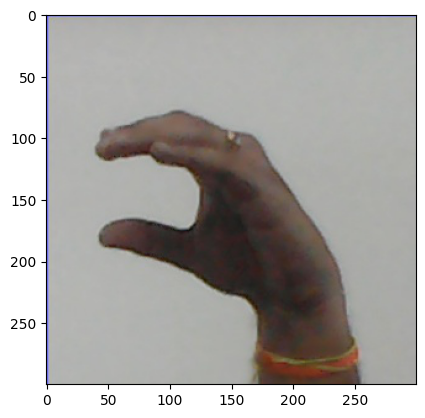

In [27]:
# Convert the normalized tensor back to a PIL image
pil_image = transforms.ToPILImage()(df.loc[700,'image_nomralized'])

# Display the PIL image using matplotlib
plt.imshow(pil_image)
plt.show()

## Shuffle and split data 8:1:1

In [28]:
# Przemieszaj dane
df = df.sample(len(df))
# Podziel dane na zbiór treningowy i testowy
train_data, train_test_data = train_test_split(df, test_size=0.2)

# Podziel zbiór treningowy na zbiory treningowy i walidacyjny
test_data, val_data = train_test_split(train_test_data, test_size=0.5)

In [29]:
# Wyświetl rozmiary zbiorów danych
print("size of training data:", len(train_data))
print("size of validation data:", len(val_data))
print("size of test data:", len(test_data))

size of training data: 1920
size of validation data: 240
size of test data: 240


In [30]:
def to_model_data(df):
    x_  = df["image_nomralized"].apply(lambda x: x.numpy())
    y_ = df["label"]
    x_ = np.array([np.array(val) for val in x_])
    y_ = np.array([np.array(val) for val in y_])
    x_ = tf.cast(x_ , dtype=tf.float32)
    y_ = tf.cast(y_ , dtype=tf.float32)
    return (x_,y_ ) 

In [34]:
(x_train, y_train) = to_model_data(train_data)

'\nx_train  = train_data["image_nomralized"].apply(lambda x: x.numpy())\ny_train = train_data["label"]\n'

In [32]:
(x_val, y_val) = to_model_data(val_data)

2023-04-12 23:30:30.672825: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [33]:
(x_test, y_test) = to_model_data(test_data)

## Defining and training a model

In [36]:
num_classes = 5
model = tf.keras.Sequential([
  tf.keras.layers.RandomRotation(0.2),
  tf.keras.layers.RandomRotation(0.8),
  tf.keras.layers.RandomZoom(0.1),
  tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D((2,2), padding= 'same'),
  tf.keras.layers.MaxPooling2D((2,2), padding= 'same'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(num_classes, activation = 'softmax')
])

In [37]:
opt = tf.keras.optimizers.experimental.RMSprop(learning_rate=0.0001)

model.compile(optimizer=opt,
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),# from_logits=True
              metrics=["accuracy"])
  
mdl = model.fit(x_train, y_train, epochs=10, validation_data=(x_val, y_val))


Epoch 1/10
60/60 [==============================] - 14s 176ms/step - loss: 0.8152 - accuracy: 0.6719 - val_loss: 1.0281 - val_accuracy: 0.6500
Epoch 2/10
60/60 [==============================] - 10s 172ms/step - loss: 0.4669 - accuracy: 0.8167 - val_loss: 0.3694 - val_accuracy: 0.9042
Epoch 3/10
60/60 [==============================] - 10s 172ms/step - loss: 0.3487 - accuracy: 0.8740 - val_loss: 0.3173 - val_accuracy: 0.8792
Epoch 4/10
60/60 [==============================] - 11s 176ms/step - loss: 0.2713 - accuracy: 0.8995 - val_loss: 0.4365 - val_accuracy: 0.8292
Epoch 5/10
60/60 [==============================] - 11s 181ms/step - loss: 0.2211 - accuracy: 0.9297 - val_loss: 0.2223 - val_accuracy: 0.9333
Epoch 6/10
60/60 [==============================] - 11s 184ms/step - loss: 0.1786 - accuracy: 0.9443 - val_loss: 0.7352 - val_accuracy: 0.6625
Epoch 7/10
60/60 [==============================] - 11s 190ms/step - loss: 0.1611 - accuracy: 0.9443 - val_loss: 0.2505 - val_accuracy: 0.9208

## Model evaluation

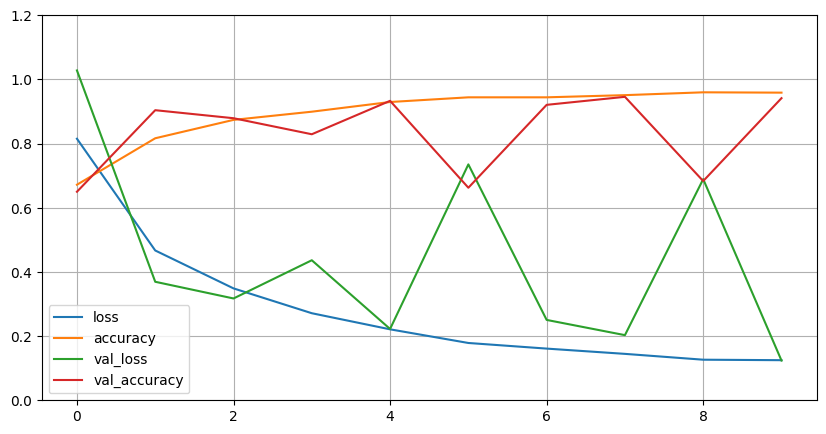

In [38]:
pd.DataFrame(mdl.history).plot(figsize=(10, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1.2) 
plt.show()

Chart clearly confirms, that some epochs were characterized by a reduced quality of prediction on the validation set. Curves for training set looks as expected: with each epoch we received lower loss and higher accuracy.

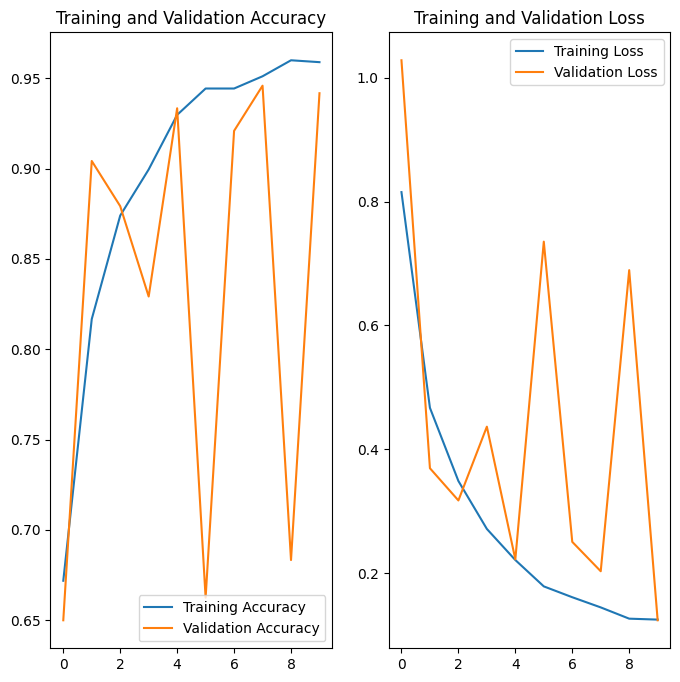

In [39]:
acc = mdl.history['accuracy']
val_acc = mdl.history['val_accuracy']

loss = mdl.history['loss']
val_loss = mdl.history['val_loss']

epochs_range = range(10)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

Results obtained on some epochs are cleary alarming. What is important the avarage loss and accuracy should be acceptable to good results.

In [40]:
y_pred = model.predict(x_test)

8/8 [==============================] - 0s 24ms/step


In [41]:
def prob_to_label(y_pred):
    predictions = []
    for arr in y_pred: 
        prediction = np.argmax(arr)
        predictions.append(prediction)
    return predictions

In [42]:
y_pred = prob_to_label(y_pred)

In [43]:
from sklearn.metrics import classification_report
target_names = ['0', 'A', 'B', 'C']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        52
           A       1.00      0.83      0.91        59
           B       0.87      1.00      0.93        59
           C       0.99      1.00      0.99        70

    accuracy                           0.96       240
   macro avg       0.96      0.96      0.96       240
weighted avg       0.96      0.96      0.96       240



Despite warning results on validation set the final evaluation on testing set gave solid results. Received model confirmed its predicting power with high accuracy for all labels.